<a href="https://colab.research.google.com/github/nmshafie1993/detect_yoga_pose/blob/master/Yoga_pose_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#loading the Libraries
import math, re, os
import numpy as np
import pandas as pd
import tensorflow as tf
import pathlib
import PIL
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
import tensorflow.keras.layers.experimental.preprocessing as preprocessing
import shutil

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.4.1


In [38]:
shutil.rmtree('/content/detect_yoga_pose')

In [39]:
#cloning the data from github
!git clone "https://github.com/nmshafie1993/detect_yoga_pose.git"

Cloning into 'detect_yoga_pose'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 1273 (delta 25), reused 43 (delta 15), pack-reused 1204
Receiving objects: 100% (1273/1273), 137.41 MiB | 44.98 MiB/s, done.
Resolving deltas: 100% (170/170), done.


In [40]:
ds_train_ = image_dataset_from_directory(
    '/content/detect_yoga_pose/Train_Set',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    '/content/detect_yoga_pose/Valid_Set',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)
ds_test_ = image_dataset_from_directory(
    '/content/detect_yoga_pose/Test_Set',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 838 files belonging to 4 classes.
Found 40 files belonging to 4 classes.
Found 41 files belonging to 4 classes.


In [63]:
class_names = ds_train_.class_names
print(class_names)
class_names = np.array(class_names).shape
class_names[1,0,0,0]

['bridge', 'childs', 'downwarddog', 'trianglepose']


TypeError: ignored

In [42]:
for image_batch, labels_batch in ds_train_:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 224, 224, 3)
(64, 4)


In [20]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_test = (
    ds_test_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [58]:
class_names[1, 0, 0, 0]

TypeError: ignored

In [54]:
labels[1][1]

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [55]:
for images, labels in ds_train_.take(1):
  print(labels[1][1])

tf.Tensor(1.0, shape=(), dtype=float32)


TypeError: ignored

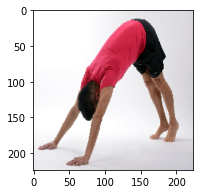

In [56]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train_.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [24]:
from keras.models import Sequential
model = Sequential([
        Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (224,224,3)),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Dropout(0.2),
        Flatten(),
        Dense(units =128, activation = 'relu'),
        Dense(units =4, activation = 'softmax'),
        
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [26]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam (learning_rate = 0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
history = model.fit(x = ds_train, 
          validation_data = ds_valid, epochs = 30, 
          verbose = 2)


Epoch 1/30
14/14 - 14s - loss: 1.7787 - accuracy: 0.2589 - val_loss: 1.4189 - val_accuracy: 0.2500
Epoch 2/30
14/14 - 1s - loss: 1.3775 - accuracy: 0.2780 - val_loss: 1.3833 - val_accuracy: 0.3750
Epoch 3/30
14/14 - 1s - loss: 1.3069 - accuracy: 0.4129 - val_loss: 1.3894 - val_accuracy: 0.4250
Epoch 4/30
14/14 - 1s - loss: 1.2305 - accuracy: 0.5752 - val_loss: 1.4011 - val_accuracy: 0.4000
Epoch 5/30
14/14 - 1s - loss: 1.1415 - accuracy: 0.6229 - val_loss: 1.3766 - val_accuracy: 0.3500
Epoch 6/30
14/14 - 1s - loss: 1.0469 - accuracy: 0.6647 - val_loss: 1.3690 - val_accuracy: 0.4250
Epoch 7/30
14/14 - 1s - loss: 0.9474 - accuracy: 0.6730 - val_loss: 1.3758 - val_accuracy: 0.3750
Epoch 8/30
14/14 - 1s - loss: 0.8518 - accuracy: 0.6993 - val_loss: 1.3579 - val_accuracy: 0.4250
Epoch 9/30
14/14 - 1s - loss: 0.7638 - accuracy: 0.7494 - val_loss: 1.3316 - val_accuracy: 0.4500
Epoch 10/30
14/14 - 1s - loss: 0.6946 - accuracy: 0.7816 - val_loss: 1.4541 - val_accuracy: 0.3500
Epoch 11/30
14/14 

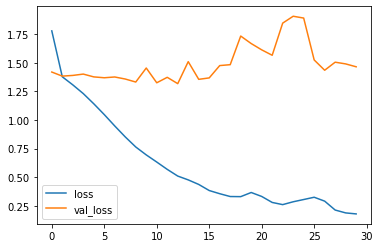

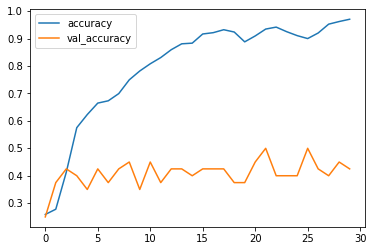

In [27]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [30]:
predictions = model.predict (x = ds_test, verbose = 0)

In [31]:
np.round(predictions)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],


In [36]:
for image, label in ds_test_:
  print(label)

tf.Tensor(
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]], shape=(41, 4), dtype=float32)


In [ ]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis = -1))

This image most likely belongs to childs with a 34.08 percent confidence.
